<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [4]:
## Write your code here
# Task 1: Display basic information and summary statistics

# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display column data types and non-null counts
print("\nBasic information:")
print(df.info())

# Display summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe(include='all'))


Shape of the dataset: (65437, 114)

Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Summary statistics:
          ResponseId                      MainBranch              Age  \
count   65437.000000                           65437            65437   
unique           NaN                               5                8   
top              NaN  I am a developer by profession  25-34 years old   
freq             NaN                           50207            23911   
mean    32719.000000                             NaN              NaN   
std     18890.179119                             NaN              NaN   
min         1.000000                             NaN              NaN   
25%     16360.000000                             NaN              NaN   
50%     32719.000000                             NaN              NaN   
75% 

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [5]:
## Write your code here
# Task 2: Identify missing values for all columns

# Count missing values per column
missing_values = df.isnull().sum()

# Filter and display only columns with missing values
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values:\n")
print(missing_columns)


Columns with missing values:

RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



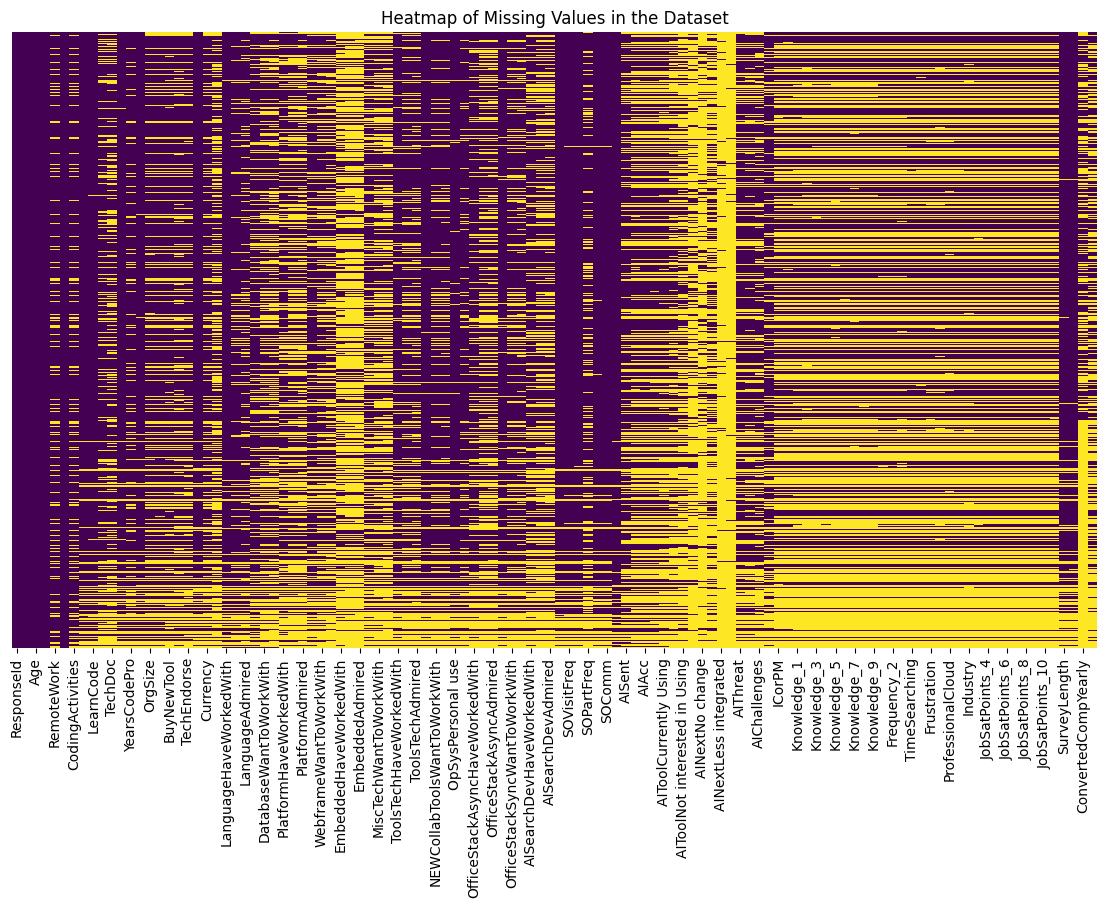

In [6]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(14, 8))

# Plot heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Add title
plt.title('Heatmap of Missing Values in the Dataset')
plt.show()


##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [18]:
missing_employment = df['Employment'].isnull().sum()
print(f"Number of missing rows in the 'Employment' column: {missing_employment}")


Number of missing rows in the 'Employment' column: 0


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [19]:
# Task 5: Find the most frequent value in the 'Employment' column
most_frequent_employment = df['Employment'].mode()[0]

print(f"The most frequent value in the 'Employment' column is: {most_frequent_employment}")


The most frequent value in the 'Employment' column is: Employed, full-time


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [20]:
# Task 6: Impute missing values in the 'Employment' column

# Step 1: Find the most frequent value
most_frequent_employment = df['Employment'].mode()[0]

# Step 2: Replace missing values with the most frequent value
df['Employment'] = df['Employment'].fillna(most_frequent_employment)

# Step 3: Confirm that there are no more missing values
missing_after_imputation = df['Employment'].isnull().sum()
print(f"Number of missing values in 'Employment' after imputation: {missing_after_imputation}")


Number of missing values in 'Employment' after imputation: 0


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


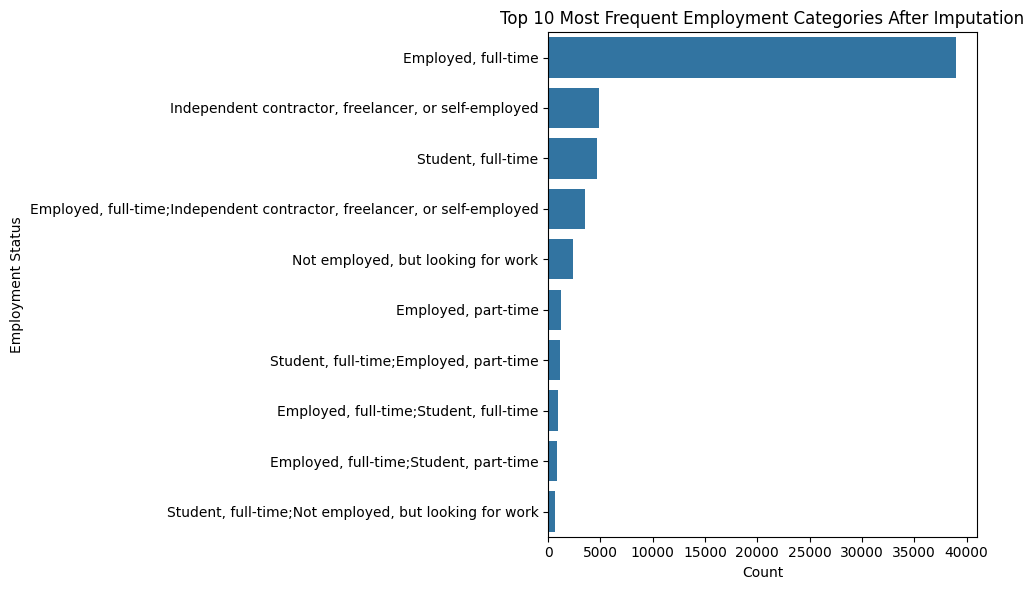

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 10 most frequent values
top_employment = df['Employment'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_employment.values, y=top_employment.index)
plt.title("Top 10 Most Frequent Employment Categories After Imputation")
plt.xlabel("Count")
plt.ylabel("Employment Status")
plt.tight_layout()
plt.show()


### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
